In [1]:
cd TDHospital/ 

/Users/sejeong/Desktop/Datathon/Hospital_exploration/TDHospital


In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from flask import Flask, jsonify, request

Epoch 1/20
  1/177 [..............................] - ETA: 20s - loss: 0.6637 - accuracy: 0.6250

/var/folders/cb/zjyrd1md2034mm_3vx4gxv6m0000gn/T/ipykernel_4142/1080629679.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace('', 0, inplace=True)
/var/folders/cb/zjyrd1md2034mm_3vx4gxv6m0000gn/T/ipykernel_4142/1080629679.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(0, inplace=True)


177/177 [==============================] - 0s 756us/step - loss: 0.6226 - accuracy: 0.6771 - val_loss: 0.6231 - val_accuracy: 0.6549
Epoch 2/20
177/177 [==============================] - 0s 469us/step - loss: 0.6066 - accuracy: 0.6863 - val_loss: 0.6273 - val_accuracy: 0.6559
Epoch 3/20
177/177 [==============================] - 0s 462us/step - loss: 0.6034 - accuracy: 0.6906 - val_loss: 0.6183 - val_accuracy: 0.6579
Epoch 4/20
177/177 [==============================] - 0s 455us/step - loss: 0.5991 - accuracy: 0.6879 - val_loss: 0.6206 - val_accuracy: 0.6619
Epoch 5/20
177/177 [==============================] - 0s 456us/step - loss: 0.5974 - accuracy: 0.6909 - val_loss: 0.6179 - val_accuracy: 0.6528
Epoch 6/20
177/177 [==============================] - 0s 453us/step - loss: 0.5949 - accuracy: 0.6902 - val_loss: 0.6316 - val_accuracy: 0.6579
Epoch 7/20
177/177 [==============================] - 0s 455us/step - loss: 0.5949 - accuracy: 0.6938 - val_loss: 0.6233 - val_accuracy: 0.6589
Epo

/Users/sejeong/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


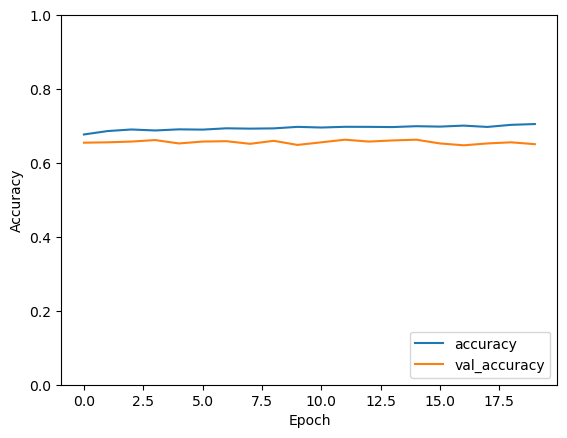

In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers


def data_preprocessing(df):
    
    col_to_keep = ['death', 'age', 'blood', 'reflex', 'bloodchem1', 'bloodchem2', 'psych1', 'glucose']
    df = df[col_to_keep]

    df.replace('', 0, inplace=True)
    df.fillna(0, inplace=True)
    return df
    
def split_feature_label(df):
    y = df['death']
    X = df.drop(columns=['death'])
    return y, X
    # print(X)
    # print(y)

    # death_0 = y.tolist().count(0)
    # death_1 = y.tolist().count(1)
    # percent_death_0 = 100 * death_0 / (death_0 + death_1)
    # percent_death_1 = 100 * death_1 / (death_0 + death_1)
    # print(f'Survived: {death_0}, or {percent_death_0:.2f}%')
    # print(f'Died: {death_1}, or {percent_death_1:.2f}%')

def standardize(X):
    scaler = StandardScaler()
    X_numeric = scaler.fit_transform(X.select_dtypes(include=['float64']))
    X[X.select_dtypes(include=['float64']).columns] = X_numeric
    return X

def train_model(X, y):
    # Split data into training and validation
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=.3, random_state=42)

    # Define the neural network model
    model = keras.Sequential([
        layers.Input(shape=(X_train.shape[1],)),  # Input layer
        layers.Dense(128, activation='relu'),     # Hidden layer with 128 neurons and ReLU activation
        layers.Dense(64, activation='relu'),      # Another hidden layer with 64 neurons and ReLU activation
        layers.Dense(1, activation='sigmoid')     # Output layer with sigmoid activation for binary classification
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))

    # Evaluate the model on the test set
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    
    model.save('example.h5')
    
    print(f'Test accuracy: {test_accuracy}')

    # Optionally, you can plot training history to visualize model performance
    import matplotlib.pyplot as plt

    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.legend(loc='lower right')
    plt.show()



data_path = 'TD_HOSPITAL_TRAIN.csv'
df = pd.read_csv(data_path)
cleaned_data = data_preprocessing(df)
y, X = split_feature_label(cleaned_data)
X = standardize(X)
train_model(X, y)

In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
df.head()

,timeknown,cost,reflex,sex,blood,bloodchem1,bloodchem2,temperature,race,heart,psych1,glucose,psych2,dose,psych3,bp,bloodchem3,confidence,bloodchem4,comorbidity,totalcost,breathing,age,sleep,dnr,bloodchem5,pdeath,meals,pain,primary,psych4,disability,administratorcost,urine,diabetes,income,extraprimary,bloodchem6,education,psych5,psych6,information,cancer,death
0,4.0,3008.38867,11.228005,male,20.699219,2.199707,1.299805,35.59375,white,103.0,4.0,157.0,2.0,5,0.0,107.0,0.399963,4.403557,12.0,6.0,2471.7988,34.0,76.56396,7.519531,dnr before sadm,7.359375,NaN,142.0,2.0,Cirrhosis,NaN,<2 mo. follow-up,3525.0,5360.0,0.0,$11-$25k,COPD/CHF/Cirrhosis,167.5000,20.0,30.0,2.000,0.0,no,1.0
1,467.0,23585.89060,9.714861,M,9.398438,NaN,0.699951,39.00000,white,50.0,3.0,271.0,1.0,5,0.0,105.0,NaN,20.260360,10.0,1.0,20651.7812,26.0,63.33499,7.479492,no dnr,7.509766,NaN,132.0,3.0,Colon Cancer,0.0,NaN,43200.0,2570.0,0.0,>$50k,Cancer,480.0000,16.0,11.5,1.000,10.0,metastatic,1.0
2,533.0,4046.45898,11.353296,Male,19.296875,NaN,1.599854,38.19531,white,50.0,3.0,117.0,0.0,5,0.0,73.0,NaN,10.153806,28.0,3.0,4113.6797,13.0,70.52698,NaN,no dnr,7.459961,NaN,131.0,1.0,ARF/MOSF w/Sepsis,1.0,no(M2 and SIP pres),5894.0,1690.0,1.0,under $11k,ARF/MOSF,177.1250,5.0,18.0,0.000,5.0,yes,0.0
3,68.0,NaN,9.269058,female,7.500000,2.500000,0.599976,37.59375,white,80.0,4.0,NaN,NaN,5,0.0,120.0,3.699707,26.700676,NaN,1.0,9094.3281,18.0,55.31799,7.379883,no dnr,NaN,NaN,121.0,1.0,Cirrhosis,2.0,NaN,16717.0,NaN,0.0,$11-$25k,COPD/CHF/Cirrhosis,NaN,12.0,7.0,1.839,12.0,no,1.0
4,1605.0,6457.70703,8.655387,female,15.099609,4.399414,0.699951,35.69531,white,114.0,4.0,NaN,6.0,5,0.0,130.0,0.399963,9.962359,NaN,2.0,7150.9766,28.0,67.06598,7.429688,no dnr,7.449219,NaN,133.0,4.0,COPD,5.0,no(M2 and SIP pres),10151.0,NaN,0.0,under $11k,COPD/CHF/Cirrhosis,233.3125,2.0,7.0,6.000,12.0,no,0.0


In [7]:
df.shape

(7058, 44)

In [8]:
data = df.copy()
data = data.drop(columns=['pdeath','dose', 'cost', 'totalcost'])

data.shape

(7058, 40)

In [9]:
# Male = 0, Female = 2, Unknown(?) = 1

data.loc[data['sex']=='male', 'sex'] = 0
data.loc[data['sex']=='Male', 'sex'] = 0
data.loc[data['sex']=='M', 'sex'] = 0
data.loc[data['sex']=='female', 'sex'] = 2
data.loc[data['sex']=='1', 'sex'] = 1

data['sex'].unique()

array([0, 2, 1], dtype=object)

In [10]:
from sklearn.preprocessing import OneHotEncoder

In [11]:
from numpy import nan

In [12]:
from sklearn.preprocessing import OneHotEncoder

In [13]:
enc = OneHotEncoder()
temp_data = enc.fit_transform(data[['sex', 'race', 'primary', 'extraprimary', 'cancer', 
                                    'income', 'dnr', 'disability']]).toarray()
temp_data

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [14]:
data = data.drop(columns=['sex', 'race', 'primary', 'extraprimary', 'cancer', 'income', 'dnr', 'disability'])
data.head()

,timeknown,reflex,blood,bloodchem1,bloodchem2,temperature,heart,psych1,glucose,psych2,psych3,bp,bloodchem3,confidence,bloodchem4,comorbidity,breathing,age,sleep,bloodchem5,meals,pain,psych4,administratorcost,urine,diabetes,bloodchem6,education,psych5,psych6,information,death
0,4.0,11.228005,20.699219,2.199707,1.299805,35.59375,103.0,4.0,157.0,2.0,0.0,107.0,0.399963,4.403557,12.0,6.0,34.0,76.56396,7.519531,7.359375,142.0,2.0,NaN,3525.0,5360.0,0.0,167.5000,20.0,30.0,2.000,0.0,1.0
1,467.0,9.714861,9.398438,NaN,0.699951,39.00000,50.0,3.0,271.0,1.0,0.0,105.0,NaN,20.260360,10.0,1.0,26.0,63.33499,7.479492,7.509766,132.0,3.0,0.0,43200.0,2570.0,0.0,480.0000,16.0,11.5,1.000,10.0,1.0
2,533.0,11.353296,19.296875,NaN,1.599854,38.19531,50.0,3.0,117.0,0.0,0.0,73.0,NaN,10.153806,28.0,3.0,13.0,70.52698,NaN,7.459961,131.0,1.0,1.0,5894.0,1690.0,1.0,177.1250,5.0,18.0,0.000,5.0,0.0
3,68.0,9.269058,7.500000,2.500000,0.599976,37.59375,80.0,4.0,NaN,NaN,0.0,120.0,3.699707,26.700676,NaN,1.0,18.0,55.31799,7.379883,NaN,121.0,1.0,2.0,16717.0,NaN,0.0,NaN,12.0,7.0,1.839,12.0,1.0
4,1605.0,8.655387,15.099609,4.399414,0.699951,35.69531,114.0,4.0,NaN,6.0,0.0,130.0,0.399963,9.962359,NaN,2.0,28.0,67.06598,7.429688,7.449219,133.0,4.0,5.0,10151.0,NaN,0.0,233.3125,2.0,7.0,6.000,12.0,0.0


In [15]:
col_list = data.columns
median_dict = dict()

for col in col_list:
    temp = data[col].median()
    data[col] = data[col].fillna(temp)
    median_dict[col] = temp

In [16]:
data.isnull().sum()

timeknown            0
reflex               0
blood                0
bloodchem1           0
bloodchem2           0
temperature          0
heart                0
psych1               0
glucose              0
psych2               0
psych3               0
bp                   0
bloodchem3           0
confidence           0
bloodchem4           0
comorbidity          0
breathing            0
age                  0
sleep                0
bloodchem5           0
meals                0
pain                 0
psych4               0
administratorcost    0
urine                0
diabetes             0
bloodchem6           0
education            0
psych5               0
psych6               0
information          0
death                0
dtype: int64

In [17]:
# onehot = pd.get_dummies(data, columns = ['sex', 'race', 'primary', 'extraprimary', 'cancer', 'income', 'dnr', 'disability']) 

In [18]:
# nancol = pd.DataFrame(onehot.isnull().sum())
# nancol = nancol.T

# nancol_list = nancol.columns

In [19]:
# median_dict = dict()

In [20]:
# for col in nancol_list:
#     if nancol.loc[0, col] > 0:
#         temp = onehot[col].median()
#         onehot[col] = onehot[col].fillna(temp)
#         median_dict[col] = temp

In [21]:
# onehot.isnull().sum()

In [22]:
y = data['death'].to_numpy()
X_temp = data.drop(columns=['death']).to_numpy()

In [23]:
X_temp.shape, y.shape, temp_data.shape

((7058, 31), (7058,), (7058, 39))

In [24]:
X = np.concatenate((X_temp,temp_data),axis=1)

In [25]:
X.shape, y.shape

((7058, 70), (7058,))

In [26]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

data_dmatrix = xgb.DMatrix(data=X,label=y)
params = {'objective':'binary:logistic','eval_metric':'error',
          'eta':0.01,
          'subsample':0.1}
xgb_cv = xgb.cv(dtrain=data_dmatrix, params=params, nfold=5, metrics = 'error',seed=42) 


In [27]:
xgb_cv 

,train-error-mean,train-error-std,test-error-mean,test-error-std
0,0.326863,0.002232,0.326863,0.00893
1,0.326863,0.002232,0.326863,0.00893
2,0.326863,0.002232,0.326863,0.00893
3,0.326863,0.002232,0.326863,0.00893
4,0.326863,0.002232,0.326863,0.00893
5,0.326863,0.002232,0.326863,0.00893
6,0.326863,0.002232,0.326863,0.00893
7,0.326863,0.002232,0.326863,0.00893
8,0.326863,0.002232,0.326863,0.00893
9,0.326863,0.002232,0.326863,0.00893


In [28]:
grid = pd.DataFrame({'eta':[0.06, 0.1, 0.15, 0.2]*3,
'subsample':np.repeat([0.6, 0.7, 0.8], 4)})

In [29]:
def fit(x):
    params = {'objective':'binary:logistic',
              'eval_metric':'error',
              'eta':x[0],
              'subsample':x[1]}
    xgb_cv = xgb.cv(dtrain=data_dmatrix, params=params, 
    nfold=5, metrics = 'error',seed=42)
    return xgb_cv[-1:].values[0]

grid[['train-error-mean','train-error-std',
'test-error-mean','test-error-std']] = grid.apply(fit,axis=1,result_type='expand')

In [30]:
grid.sort_values(by='test-error-mean')

,eta,subsample,train-error-mean,train-error-std,test-error-mean,test-error-std
11,0.20,0.8,0.048987,0.001657,0.083026,0.004247
10,0.15,0.8,0.050050,0.002138,0.083876,0.004091
5,0.10,0.7,0.056567,0.001455,0.084585,0.005173
7,0.20,0.7,0.052104,0.002672,0.085009,0.006114
6,0.15,0.7,0.053875,0.001293,0.085010,0.005165
9,0.10,0.8,0.054761,0.001276,0.085576,0.003849
3,0.20,0.6,0.052565,0.001068,0.086142,0.004174
2,0.15,0.6,0.055717,0.001457,0.087843,0.003770
1,0.10,0.6,0.058338,0.002133,0.088976,0.004430
8,0.06,0.8,0.071196,0.002845,0.096769,0.007043


In [31]:
xgb_reg = xgb.XGBRegressor(objective='binary:logistic',
                           eval_metric = 'error',
                           eta = 0.2,
                           subsample = 0.8)

xgb_reg.fit(X, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.2, eval_metric='error',
             feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [32]:
X[:1].shape

(1, 70)

In [45]:
ans = xgb_reg.predict(X)
ans_df = pd.DataFrame(ans)
ans_df

,0
0,0.997599
1,0.946128
2,0.124948
3,0.999238
4,0.026615
5,0.999498
6,0.946514
7,0.003343
8,0.999175
9,0.999492


In [46]:
ans_df['y'] = pd.DataFrame(y)
ans_df

,0,y
0,0.997599,1.0
1,0.946128,1.0
2,0.124948,0.0
3,0.999238,1.0
4,0.026615,0.0
5,0.999498,1.0
6,0.946514,1.0
7,0.003343,0.0
8,0.999175,1.0
9,0.999492,1.0


In [34]:
ans = (ans > 0.5)*1.0

In [35]:
# df[df=='Male']= np.nan
# df

In [36]:
df['sex'].unique()

array(['male', 'M', 'Male', 'female', '1'], dtype=object)

0.6: 94  
0.7: 96  
0.75: 96

In [55]:
class Solution:
    def __init__(self):
        #Initialize any global variables here
        self.model = tf.keras.models.load_model('example.h5')

    def calculate_death_prob(self, timeknown, cost, reflex, sex, blood, bloodchem1, bloodchem2, temperature, race,
                             heart, psych1, glucose, psych2, dose, psych3, bp, bloodchem3, confidence, bloodchem4,
                             comorbidity, totalcost, breathing, age, sleep, dnr, bloodchem5, pdeath, meals, pain,
                             primary, psych4, disability, administratorcost, urine, diabetes, income, extraprimary,
                             bloodchem6, education, psych5, psych6, information, cancer):
        
        """
        This function should return your final prediction!
        """
        labels = ['timeknown', 'cost', 'reflex', 'blood', 'bloodchem1',
                   'bloodchem2', 'temperature', 'heart', 'psych1', 'glucose',
                   'psych2', 'dose', 'psych3', 'bp', 'bloodchem3', 'confidence',
                   'bloodchem4', 'comorbidity', 'totalcost', 'breathing', 'age', 'sleep',
                   'bloodchem5', 'pdeath', 'meals', 'pain', 'psych4',
                   'administratorcost', 'urine', 'diabetes',
                   'bloodchem6', 'education', 'psych5', 'psych6', 'information']
        
        values = [float(x) for x in [timeknown, cost, reflex, blood, bloodchem1,
                                    bloodchem2, temperature, heart, psych1, glucose,
                                    psych2, dose, psych3, bp, bloodchem3, confidence,
                                    bloodchem4, comorbidity, totalcost, breathing, age, sleep,
                                    bloodchem5, pdeath, meals, pain, psych4, administratorcost, 
                                    urine, diabetes, bloodchem6, education, psych5, psych6, information]]
        
        category_labels = ['sex', 'race', 'primary', 'extraprimary', 'cancer', 'income', 'dnr', 'disability']
        category_values = [sex, race, primary, extraprimary, cancer, income, dnr, disability]
        
        df = dict()
        for label, value in zip(labels, values):
            df[label] = [value]
            
        for label, value in zip(category_labels, category_values):
            df[label] = [value]
            
        data = pd.DataFrame(df)
        data.replace('', 0, inplace=True)
         
        data = data.drop(columns=['pdeath','dose', 'cost', 'totalcost'])
        
        data.loc[data['sex']=='male', 'sex'] = 0
        data.loc[data['sex']=='Male', 'sex'] = 0
        data.loc[data['sex']=='M', 'sex'] = 0
        data.loc[data['sex']=='female', 'sex'] = 2
        data.loc[data['sex']=='1', 'sex'] = 1

        data[data=='nan'] = nan
        
        temp_data = enc.transform(data[['sex', 'race', 'primary', 'extraprimary', 'cancer', 
                                    'income', 'dnr', 'disability']]).toarray()
        
        data = data.drop(columns=['sex', 'race', 'primary', 'extraprimary', 'cancer', 'income', 
                                  'dnr', 'disability'])
        
        for col in data.columns:
            data[col] = data[col].astype(float)

        for col in data.columns:
            data[col] = data[col].fillna(median_dict[col])

        X_temp = data.to_numpy()
        X = np.concatenate((X_temp,temp_data),axis=1)
        
        ans = xgb_reg.predict(X)
        ans = (ans > 0.8)*1.0
        
        print(1.0-ans[0])
        
        """
        This function should return your final prediction!
        """
#         timeknown, cost, reflex, sex, blood, bloodchem1, bloodchem2, temperature, race,
#                              heart, psych1, glucose, psych2, dose, psych3, bp, bloodchem3, confidence, bloodchem4,
#                              comorbidity, totalcost, breathing, age, sleep, dnr, bloodchem5, pdeath, meals, pain,
#                              primary, psych4, disability, administratorcost, urine, diabetes, income, extraprimary,
#                              bloodchem6, education, psych5, psych6, information, cancer
        
        
        return float(1.0-ans[0])

In [56]:
# Run web server
app = Flask(__name__)

@app.route("/death_probability", methods=["POST"])
def q1():
    solution = Solution()
    data = request.get_json()
    return {
        "probability": solution.calculate_death_prob(data['timeknown'], data['cost'], data['reflex'], data['sex'], data['blood'],
                                            data['bloodchem1'], data['bloodchem2'], data['temperature'], data['race'],
                                            data['heart'], data['psych1'], data['glucose'], data['psych2'],
                                            data['dose'], data['psych3'], data['bp'], data['bloodchem3'],
                                            data['confidence'], data['bloodchem4'], data['comorbidity'],
                                            data['totalcost'], data['breathing'], data['age'], data['sleep'],
                                            data['dnr'], data['bloodchem5'], data['pdeath'], data['meals'],
                                            data['pain'], data['primary'], data['psych4'], data['disability'],
                                            data['administratorcost'], data['urine'], data['diabetes'], data['income'],
                                            data['extraprimary'], data['bloodchem6'], data['education'], data['psych5'],
                                            data['psych6'], data['information'], data['cancer'])}

if __name__ == "__main__":
    app.run(host="0.0.0.0", port=5555)

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5555
 * Running on http://10.50.192.78:5555
Press CTRL+C to quit
127.0.0.1 - - [28/Oct/2023 20:01:46] "POST /death_probability HTTP/1.1" 200 -
127.0.0.1 - - [28/Oct/2023 20:01:47] "POST /death_probability HTTP/1.1" 200 -


0.0
0.0


127.0.0.1 - - [28/Oct/2023 20:01:47] "POST /death_probability HTTP/1.1" 200 -
127.0.0.1 - - [28/Oct/2023 20:01:47] "POST /death_probability HTTP/1.1" 200 -


1.0
1.0


127.0.0.1 - - [28/Oct/2023 20:01:47] "POST /death_probability HTTP/1.1" 200 -
127.0.0.1 - - [28/Oct/2023 20:01:47] "POST /death_probability HTTP/1.1" 200 -


0.0
1.0


127.0.0.1 - - [28/Oct/2023 20:01:47] "POST /death_probability HTTP/1.1" 200 -
127.0.0.1 - - [28/Oct/2023 20:01:47] "POST /death_probability HTTP/1.1" 200 -


1.0
1.0


127.0.0.1 - - [28/Oct/2023 20:01:48] "POST /death_probability HTTP/1.1" 200 -
127.0.0.1 - - [28/Oct/2023 20:01:48] "POST /death_probability HTTP/1.1" 200 -


1.0
0.0


127.0.0.1 - - [28/Oct/2023 20:01:48] "POST /death_probability HTTP/1.1" 200 -
127.0.0.1 - - [28/Oct/2023 20:01:48] "POST /death_probability HTTP/1.1" 200 -


0.0
0.0


127.0.0.1 - - [28/Oct/2023 20:01:48] "POST /death_probability HTTP/1.1" 200 -
127.0.0.1 - - [28/Oct/2023 20:01:48] "POST /death_probability HTTP/1.1" 200 -


0.0
0.0


127.0.0.1 - - [28/Oct/2023 20:01:48] "POST /death_probability HTTP/1.1" 200 -
127.0.0.1 - - [28/Oct/2023 20:01:48] "POST /death_probability HTTP/1.1" 200 -


0.0
0.0


127.0.0.1 - - [28/Oct/2023 20:01:49] "POST /death_probability HTTP/1.1" 200 -
127.0.0.1 - - [28/Oct/2023 20:01:49] "POST /death_probability HTTP/1.1" 200 -


0.0
1.0


127.0.0.1 - - [28/Oct/2023 20:01:49] "POST /death_probability HTTP/1.1" 200 -
127.0.0.1 - - [28/Oct/2023 20:01:49] "POST /death_probability HTTP/1.1" 200 -


1.0
0.0


127.0.0.1 - - [28/Oct/2023 20:01:49] "POST /death_probability HTTP/1.1" 200 -
127.0.0.1 - - [28/Oct/2023 20:01:49] "POST /death_probability HTTP/1.1" 200 -


0.0
0.0


127.0.0.1 - - [28/Oct/2023 20:01:49] "POST /death_probability HTTP/1.1" 200 -
127.0.0.1 - - [28/Oct/2023 20:01:49] "POST /death_probability HTTP/1.1" 200 -


0.0
0.0


127.0.0.1 - - [28/Oct/2023 20:01:50] "POST /death_probability HTTP/1.1" 200 -
127.0.0.1 - - [28/Oct/2023 20:01:50] "POST /death_probability HTTP/1.1" 200 -


1.0
0.0


127.0.0.1 - - [28/Oct/2023 20:01:50] "POST /death_probability HTTP/1.1" 200 -
127.0.0.1 - - [28/Oct/2023 20:01:50] "POST /death_probability HTTP/1.1" 200 -


0.0
1.0


127.0.0.1 - - [28/Oct/2023 20:01:50] "POST /death_probability HTTP/1.1" 200 -
127.0.0.1 - - [28/Oct/2023 20:01:50] "POST /death_probability HTTP/1.1" 200 -


0.0
0.0


127.0.0.1 - - [28/Oct/2023 20:01:50] "POST /death_probability HTTP/1.1" 200 -
127.0.0.1 - - [28/Oct/2023 20:01:51] "POST /death_probability HTTP/1.1" 200 -


0.0
0.0


127.0.0.1 - - [28/Oct/2023 20:01:51] "POST /death_probability HTTP/1.1" 200 -
127.0.0.1 - - [28/Oct/2023 20:01:51] "POST /death_probability HTTP/1.1" 200 -


0.0
0.0


127.0.0.1 - - [28/Oct/2023 20:01:51] "POST /death_probability HTTP/1.1" 200 -
127.0.0.1 - - [28/Oct/2023 20:01:51] "POST /death_probability HTTP/1.1" 200 -


0.0
1.0


127.0.0.1 - - [28/Oct/2023 20:01:51] "POST /death_probability HTTP/1.1" 200 -
127.0.0.1 - - [28/Oct/2023 20:01:51] "POST /death_probability HTTP/1.1" 200 -


0.0
1.0


127.0.0.1 - - [28/Oct/2023 20:01:52] "POST /death_probability HTTP/1.1" 200 -
127.0.0.1 - - [28/Oct/2023 20:01:52] "POST /death_probability HTTP/1.1" 200 -


0.0
0.0


127.0.0.1 - - [28/Oct/2023 20:01:52] "POST /death_probability HTTP/1.1" 200 -
127.0.0.1 - - [28/Oct/2023 20:01:52] "POST /death_probability HTTP/1.1" 200 -


0.0
1.0


127.0.0.1 - - [28/Oct/2023 20:01:52] "POST /death_probability HTTP/1.1" 200 -
127.0.0.1 - - [28/Oct/2023 20:01:52] "POST /death_probability HTTP/1.1" 200 -


0.0
0.0


127.0.0.1 - - [28/Oct/2023 20:01:52] "POST /death_probability HTTP/1.1" 200 -
127.0.0.1 - - [28/Oct/2023 20:01:52] "POST /death_probability HTTP/1.1" 200 -


1.0
1.0


127.0.0.1 - - [28/Oct/2023 20:01:53] "POST /death_probability HTTP/1.1" 200 -
127.0.0.1 - - [28/Oct/2023 20:01:53] "POST /death_probability HTTP/1.1" 200 -


0.0
1.0


127.0.0.1 - - [28/Oct/2023 20:01:53] "POST /death_probability HTTP/1.1" 200 -
127.0.0.1 - - [28/Oct/2023 20:01:53] "POST /death_probability HTTP/1.1" 200 -


0.0
0.0


In [45]:
class Solution:
    def __init__(self):
        #Initialize any global variables here
        self.model = tf.keras.models.load_model('example.h5')

    def calculate_death_prob(self, data):
        
#         print(data)
        
        for key in data.keys():
            data[key] = [data[key]]
        
        data = pd.DataFrame.from_dict(data)
        
        
        data = data.drop(columns=['pdeath','dose', 'cost', 'totalcost'])
        
        data.loc[data['sex']=='male', 'sex'] = 0
        data.loc[data['sex']=='Male', 'sex'] = 0
        data.loc[data['sex']=='M', 'sex'] = 0
        data.loc[data['sex']=='female', 'sex'] = 2
        data.loc[data['sex']=='1', 'sex'] = 1

        data[data=='nan'] = nan
        
        temp_data = enc.transform(data[['sex', 'race', 'primary', 'extraprimary', 'cancer', 
                                    'income', 'dnr', 'disability']]).toarray()
        
        data = data.drop(columns=['sex', 'race', 'primary', 'extraprimary', 'cancer', 'income', 
                                  'dnr', 'disability'])
        
        for col in data.columns:
            data[col] = data[col].astype(float)

        for col in data.columns:
            data[col] = data[col].fillna(median_dict[col])

        X_temp = data.to_numpy()
        X = np.concatenate((X_temp,temp_data),axis=1)
        
        ans = xgb_reg.predict(X)
        
        """
        This function should return your final prediction!
        """
#         timeknown, cost, reflex, sex, blood, bloodchem1, bloodchem2, temperature, race,
#                              heart, psych1, glucose, psych2, dose, psych3, bp, bloodchem3, confidence, bloodchem4,
#                              comorbidity, totalcost, breathing, age, sleep, dnr, bloodchem5, pdeath, meals, pain,
#                              primary, psych4, disability, administratorcost, urine, diabetes, income, extraprimary,
#                              bloodchem6, education, psych5, psych6, information, cancer
        
        
        return ans[0]

In [46]:
# Run web server
app = Flask(__name__)

@app.route("/death_probability", methods=["POST"])
def q1():
    solution = Solution()
    data = request.get_json()
    return {
        "probability": solution.calculate_death_prob(data)}

# data['timeknown'], data['cost'], data['reflex'], data['sex'], data['blood'],
#                                             data['bloodchem1'], data['bloodchem2'], data['temperature'], data['race'],
#                                             data['heart'], data['psych1'], data['glucose'], data['psych2'],
#                                             data['dose'], data['psych3'], data['bp'], data['bloodchem3'],
#                                             data['confidence'], data['bloodchem4'], data['comorbidity'],
#                                             data['totalcost'], data['breathing'], data['age'], data['sleep'],
#                                             data['dnr'], data['bloodchem5'], data['pdeath'], data['meals'],
#                                             data['pain'], data['primary'], data['psych4'], data['disability'],
#                                             data['administratorcost'], data['urine'], data['diabetes'], data['income'],
#                                             data['extraprimary'], data['bloodchem6'], data['education'], data['psych5'],
#                                             data['psych6'], data['information'], data['cancer']

if __name__ == "__main__":
    app.run(host="0.0.0.0", port=5555)

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5555
 * Running on http://10.50.192.78:5555
Press CTRL+C to quit
[2023-10-28 19:05:42,597] ERROR in app: Exception on /death_probability [POST]
Traceback (most recent call last):
  File "/Users/sejeong/anaconda3/lib/python3.11/site-packages/flask/app.py", line 2525, in wsgi_app
    response = self.full_dispatch_request()
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/sejeong/anaconda3/lib/python3.11/site-packages/flask/app.py", line 1823, in full_dispatch_request
    return self.finalize_request(rv)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/sejeong/anaconda3/lib/python3.11/site-packages/flask/app.py", line 1842, in finalize_request
    response = self.make_response(rv)
               ^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/sejeong/anaconda3/lib/python3.11/site-packages/flask/app.py", line 2153, in make_response
    rv = self.json.response(rv)
         ^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/sejeong/a

In [ ]:
corr = onehot.corr()
corr.style.background_gradient(cmap='coolwarm')

In [ ]:
features = pd.DataFrame(df.isna().sum(), columns=['Nan'])

for col in df.columns:
    features.loc[col, 'dtype'] = df[col].dtype

features